# Using Multiple Trees

### Introduction

In the last few lessons, we saw how decision trees can overfit.  An unbounded decision tree can perfectly predict the training set because each leaf node predicts just a single sample.  

With each prediction made from a sample size of one, the predictions do not necessarily generalize to future data.  

We then saw one way to limit this variance, which is limit the number of levels in our decision tree.  This solution, does a fine job of overfitting in the leaf nodes, but unfortunately, does not solve the problem of variance all together.  We'll explore other sources of variance and in decision trees, and how we can correct for them.

### Loading our data

In this lesson, we worked with the Airbnb dataset again.

In [1]:
import pandas as pd
df = pd.read_feather('./cleaned_df.feather')
X = df.drop(columns=['price'])
y = df.price

#### Training our trees

1. The first tree

Let's keep our first decision tree simple, by limiting our tree to a max depth of 3.  As we know this should reduce the variance of the tree as it is less responsive to the data.

In [3]:
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.40, random_state=42)

from sklearn.tree import DecisionTreeRegressor
dtr_1 = DecisionTreeRegressor(max_depth=3)
dtr_1.fit(X_train_1, y_train_1)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

2. The second tree

Now let's train a second tree the same way.  To ensure our tree is different than the first, we'll  train on a different subset of the data by changing the value of our random state.

In [4]:
from sklearn.model_selection import train_test_split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.40, random_state=21)
from sklearn.tree import DecisionTreeRegressor
dtr_2 = DecisionTreeRegressor(max_depth=3)
dtr_2.fit(X_train_2, y_train_2)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

### Comparing our trees

Ok, now let's compare our two trees.  As we'll see below, there is even a degree of variance in the early layers of the tree.

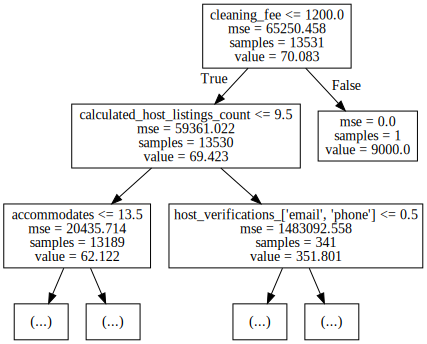

In [5]:
from sklearn import tree
from IPython.display import SVG, display
from graphviz import Source 


graph_1 = Source(tree.export_graphviz(dtr_1, out_file=None,
                                feature_names=X.columns, max_depth = 2))

graph_1

And this is the second.

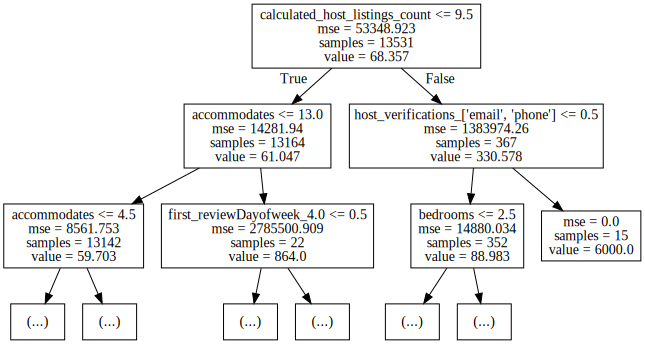

In [6]:
graph_2 = Source(tree.export_graphviz(dtr_2, out_file=None,
                                feature_names=X.columns, max_depth = 2))

graph_2

So while there is some overlap between the attributes selected, half of the attributes in the second tree are new.  So even early on in the tree, we see that variations in the splits near the top layers.  And variations of our tree in the top layers will impact later splits of the data and thus lead to more variation later on. 

And of course, this leads to differences in predictions.

### Viewing the different predictions

Let's take a look at the different predictions of our two trees.

> Below we select ten datapoints that are not in training sets of either tree.

In [7]:
import numpy as np
ten_in_both_test_sets = np.array([221,  7922, 17116, 11118,  2497,  4199,  8692,  5348, 14548, 1455])
ten_X = X.iloc[ten_in_both_test_sets, :]
ten_y = y[ten_in_both_test_sets]

> Now let's find the predictions of the two trees.

In [8]:
dtr_1_predictions = dtr_1.predict(ten_X)
dtr_2_predictions = dtr_2.predict(ten_X)
df_predictions = pd.DataFrame({'dtr_1_predictions': dtr_1_predictions, 
                               'dtr_2_predictions': dtr_2_predictions, 'ten_y': ten_y.to_numpy()})
df_predictions

,dtr_1_predictions,dtr_2_predictions,ten_y
0,60.682688,53.676296,63.0
1,60.682688,53.676296,20.0
2,60.682688,53.676296,45.0
3,60.682688,53.676296,40.0
4,60.682688,53.676296,22.0
5,60.682688,130.868421,95.0
6,60.682688,53.676296,43.0
7,60.682688,53.676296,25.0
8,60.682688,53.676296,42.0
9,60.682688,53.676296,100.0


### Recognize the Variance

Let's take a second to appreciate the variance in the predictions and the trees above.  First, note that our trees are both relatively simple, yet they still make different predictions.  And unlike in our previous lesson, this isn't due to each leaf fitting to a small number of samples in the leaves.  Rather we see variance in our first couple of splits. 

Decision trees are highly variant because they have very few assumptions about the data -- unlike say a linear model which assumes that the data fits some form of a line.  With a decision trees, we are working with a very flexible model and this gives us a wide degree of variation.

In addition, a particular split at the top, will divide the data differently, and thus will affect the splits in subsequent layers.  These differences in splits lead to different predictions.  So the point is with decision trees we can get variation not only at the leaves of the tree, but also near the roots.  And early stopping won't correct for all of these sources of variance.

However, there are other ways to correct for variance.  Remember that with error due to variance, we expect each individual predictor to be incorrect yet the average of these predictions to approach the true target.  So if we were to fit many decision trees, and use the average of these predictions as our prediction of the target, this should reduce our error from variance.  This is a random forest. 

The idea is to use a highly flexible model that responds and fits to the data, yet has minimum variance by aggregating multiple instances of the model.  In the next lesson, we'll begin exploring the random forest, and better understand how it works.

### Summary

In this lesson, we saw how decision trees not only have variance due to a small number of samples in the leaves, but can also vary near the root nodes.  This variance towards the top of the tree effects the splits that are made subsequently.  Early stopping won't correct for this type of variance, as it reduces variance near the leaves of the tree.  But a random forest can.  The idea of a random forest is that while each individual tree suffers from variance, we expect the average of the predictions of the trees to approach the observed target.  